## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [10]:
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [9]:
train, test = tf.keras.datasets.cifar10.load_data()

In [16]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = tf.keras.utils.to_categorical(y, num_classes)
    return y   

In [17]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256, 256, 128,128]):
    input_layer = tf.keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model=build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total para

In [21]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [22]:
optimizer = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [23]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50000/50000 [==============================] - 8s 158us/sample - loss: 1.9166 - acc: 0.3013 - val_loss: 1.7322 - val_acc: 0.3757
Epoch 2/100
50000/50000 [==============================] - 8s 153us/sample - loss: 1.7174 - acc: 0.3794 - val_loss: 1.6765 - val_acc: 0.4041
Epoch 3/100
50000/50000 [==============================] - 7s 142us/sample - loss: 1.6265 - acc: 0.4147 - val_loss: 1.5830 - val_acc: 0.4311
Epoch 4/100
50000/50000 [==============================] - 7s 138us/sample - loss: 1.5552 - acc: 0.4417 - val_loss: 1.5462 - val_acc: 0.4390
Epoch 5/100
50000/50000 [==============================] - 7s 137us/sample - loss: 1.4990 - acc: 0.4633 - val_loss: 1.5088 - val_acc: 0.4569
Epoch 6/100
50000/50000 [==============================] - 7s 138us/sample - loss: 1.4667 - acc: 0.4732 - val_loss: 1.5514 - val_acc: 0.4449
Epoch 7/100
50000/50000 [==============================]

Epoch 57/100
50000/50000 [==============================] - 7s 148us/sample - loss: 0.4464 - acc: 0.8383 - val_loss: 2.4393 - val_acc: 0.4981
Epoch 58/100
50000/50000 [==============================] - 7s 146us/sample - loss: 0.4391 - acc: 0.8416 - val_loss: 2.4687 - val_acc: 0.5107
Epoch 59/100
50000/50000 [==============================] - 7s 147us/sample - loss: 0.4040 - acc: 0.8532 - val_loss: 2.5755 - val_acc: 0.5039
Epoch 60/100
50000/50000 [==============================] - 7s 145us/sample - loss: 0.4135 - acc: 0.8507 - val_loss: 2.4751 - val_acc: 0.5018
Epoch 61/100
50000/50000 [==============================] - 7s 150us/sample - loss: 0.3838 - acc: 0.8619 - val_loss: 2.5143 - val_acc: 0.5011
Epoch 62/100
50000/50000 [==============================] - 7s 146us/sample - loss: 0.3876 - acc: 0.8610 - val_loss: 2.5862 - val_acc: 0.4966
Epoch 63/100
50000/50000 [==============================] - 8s 153us/sample - loss: 0.4156 - acc: 0.8519 - val_loss: 2.6002 - val_acc: 0.4981
Epoch 

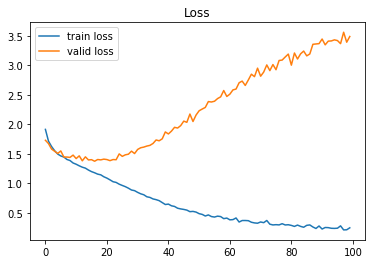

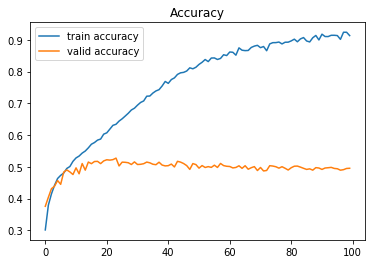

In [25]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()